# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
import pandas as pd
import scipy
from scipy.stats import ttest_rel
from scipy.stats import chi2
from scipy.stats import f
import numpy as np
from scipy.stats import chi2_contingency


## Reading the Data into a DataFrame

In [2]:
# import the data
df = pd.read_csv('abtest.csv')
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
# Viewing the first and last few rows of the dataset
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [4]:
# Checking the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
# Getting the statistical summary for the variables
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [6]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [7]:
# - Check for duplicates
df.duplicated().sum()

0

### Univariate Analysis

In [8]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


In [9]:
df.language_preferred.value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

In [10]:
df.landing_page.value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

In [11]:
df.converted.value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

### Bivariate Analysis

In [12]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


In [13]:
ts_base_on_page = df.groupby('landing_page').time_spent_on_the_page.sum()
ts_base_on_page

landing_page
new    311.16
old    226.62
Name: time_spent_on_the_page, dtype: float64

- Total Time spent base on new page is 311.16 minutes
- Total Time spent base on old page is 226.62 minutes

In [14]:
converted_base_on_page = df.groupby('landing_page').converted.value_counts()
converted_base_on_page

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

- Converted base on new page is 33
- Converted base on old page is 21

In [15]:
converted_base_on_lang = df.groupby('language_preferred').converted.value_counts()
converted_base_on_lang

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64

- Converted base on English language is 21
- Converted base on French language is 15
- Converted base on Spanish language is 18


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [16]:
ts_base_on_page

landing_page
new    311.16
old    226.62
Name: time_spent_on_the_page, dtype: float64

In [17]:
df.groupby('landing_page').time_spent_on_the_page.count()

landing_page
new    50
old    50
Name: time_spent_on_the_page, dtype: int64

In [18]:
old_mean = 226.62/50
new_mean = 311.16/50
old_mean,new_mean

(4.5324, 6.2232)

<Axes: xlabel='landing_page'>

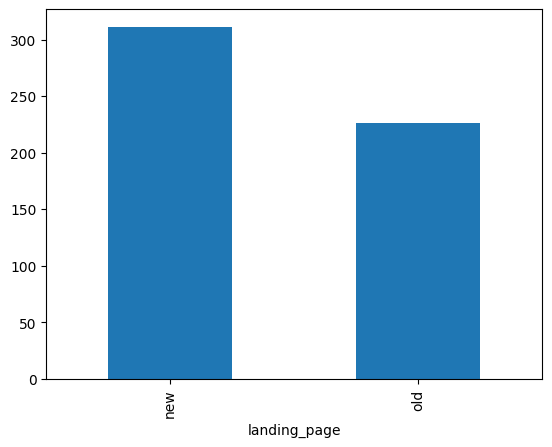

In [19]:
ts_base_on_page.plot(kind='bar')

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2$ be the mean munites spent on the pages base on new and old respectively.

We want to test whether there is really an increase in the minutes spent on the pages base on new landing page.

We will test the null hypothesis

>$H_0:\mu_1>\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$

### Step 2: Select Appropriate test

### Let's test whether the paired T-test assumptions are satisfied or not

* Continuous data - Yes, the house price is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent observations - As we are taking the sampled unit randomly, the observed units are independent.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use paired sample T-test for this problem.



### Step 3: Decide the significance level

Assuming the visitors are normally distributed, do we have enough statistical evidence to say that there is an increase in the time spent in one page at 0.05 significance level?

### Step 4: Collect and prepare data

In [20]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


In [21]:
old_mean = 226.62/50
new_mean = 311.16/50
n = 50
old_mean,new_mean

old_page_time = df[df.landing_page == 'old'].time_spent_on_the_page
new_page_time = df[df.landing_page == 'new'].time_spent_on_the_page

In [22]:
old_page_time.shape,new_page_time.shape

((50,), (50,))

### Step 5: Calculate the p-value

In [23]:
# find the p-value
test_stat, p_value = ttest_rel(old_page_time, new_page_time, alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.00029910900937037973


### Step 6: Compare the p-value with $\alpha$

p-value is much less than the level of significance.

### Step 7:  Draw inference

The null hypothesis can be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that there was a decrease/ in the time spent on the new page than the old

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [24]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


### Perform Visual Analysis

<Axes: xlabel='landing_page,converted'>

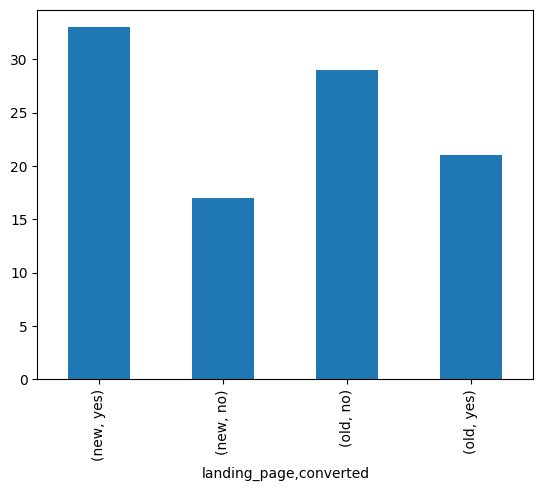

In [25]:
converted_base_on_page.plot(kind='bar')

In [26]:
old_page_convert = df[df.landing_page == 'old'].converted.value_counts()
new_page_convert = df[df.landing_page == 'new'].converted.value_counts()

new_page_convert,old_page_convert

(converted
 yes    33
 no     17
 Name: count, dtype: int64,
 converted
 no     29
 yes    21
 Name: count, dtype: int64)

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis

Let $\sigma^1, \sigma^2$ be the mean convertion rate on the pages base on new and old respectively.

We want to test whether there is really an increase in the convertion rate on the pages base on new landing page.

We will test the null hypothesis

>$H_0:\sigma^1>\sigma^2$

against the alternate hypothesis

>$H_a:\sigma^1<\sigma^2$

### Step 2: Select Appropriate test

### Let's test whether the assumptions are satisfied or not

* Categorical data - Yes
* Normally distributed population - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.   


### Step 3: Decide the significance level

Assuming the visitors are normally distributed, do we have enough statistical evidence to say that there is an increase in the convertion rate in one page at 0.05 significance level?

### Step 4: Collect and prepare data

In [27]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


In [28]:
old_page_convert = df[df.landing_page == 'old'].converted.value_counts()
new_page_convert = df[df.landing_page == 'new'].converted.value_counts()

new_page_convert,old_page_convert

(converted
 yes    33
 no     17
 Name: count, dtype: int64,
 converted
 no     29
 yes    21
 Name: count, dtype: int64)

In [29]:
np.std(new_page_convert),np.std(old_page_convert)

(8.0, 4.0)

- convertion rate $\sigma^1$ is 8
- convertion rate $\sigma^2$ is 4

### Step 5: Calculate the p-value

In [30]:
#user-defined function to get the test stat and p-value
# To know more about the derivation of test statistic formula, please refer to the monographs and additional materials
def chi_var(pop_var, sample_var, n):
  # calculate the test statistic
  test_stat = (n - 1) * sample_var / pop_var
  # calculate the p-value
  p_value = 1 - chi2.cdf(test_stat, n-1)
  return (test_stat, p_value)

# set the value of sample size
n = 50
# set the values of population and sample variance
sigma_2, s_2 = 8**2, 4**2

test_stat, p_value = chi_var(sigma_2, s_2, n)

print('The p-value is ', p_value)

The p-value is  0.9999999821234132


### Step 6: Compare the p-value with $\alpha$

The p-value is greater than the significance level.

### Step 7:  Draw inference

### Insight
As the p-value is greater than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the standard deviation of the convertion rate on the new page is not greater at 0.05 level of significance.

## 3. Is the conversion and preferred language are independent or related?

In [31]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


In [32]:
converted_base_on_lang = df.groupby('language_preferred').converted.value_counts()
converted_base_on_lang

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64

### Perform Visual Analysis

<Axes: xlabel='language_preferred,converted'>

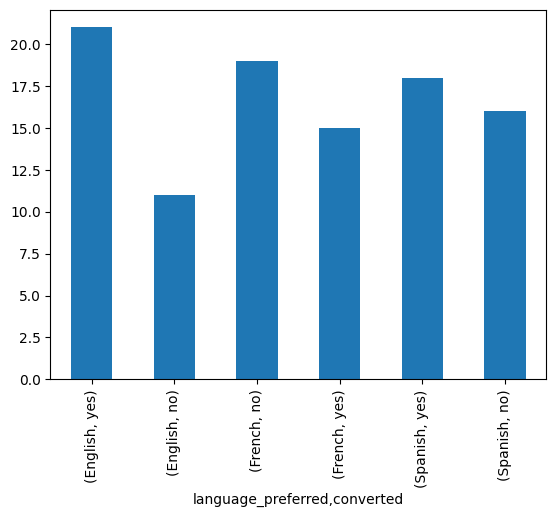

In [33]:
converted_base_on_lang.plot(kind='bar')

### Step 1: Define the null and alternate hypotheses


We will test the null hypothesis

>$H_0$: *They are independent*

against the alternate hypothesis

>$H_a$: *They are related*

### Step 2: Select Appropriate test

Let's take 0.05 level of significance?

### Let's test whether the assumptions are satisfied or not

* Categorical data - Yes
* Normally distributed population 
* Random sampling from the population - Yes, 

### Step 3: Collect and prepare data

In [34]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


In [35]:
converted_base_on_lang = df.groupby('language_preferred').converted.value_counts()
converted_base_on_lang

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: count, dtype: int64

### Step 4: Calculate the p-value

In [36]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(converted_base_on_lang)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.0


### Step 5:  Draw inference

In the above example, the P-value came higher than 0.05. Hence H0 will be accepted. Which means the variables are not correlated with each other.

## 4. Is the time spent on the new page same for the different language users?

In [37]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


### Perform Visual Analysis

In [38]:
ts_base_on_page_lang = df.groupby(['landing_page','language_preferred']).time_spent_on_the_page.sum()
ts_base_on_page_lang
ts_base_on_page_lang = ts_base_on_page_lang.iloc[ts_base_on_page_lang.index.get_level_values('landing_page') == 'new']
ts_base_on_page_lang

landing_page  language_preferred
new           English               106.62
              French                105.34
              Spanish                99.20
Name: time_spent_on_the_page, dtype: float64

<Axes: xlabel='landing_page,language_preferred'>

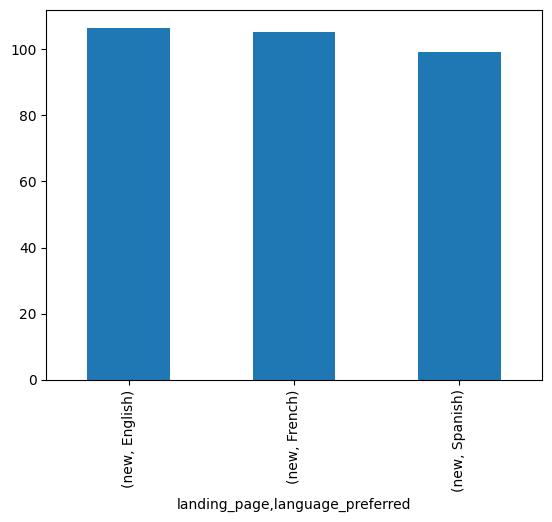

In [39]:
ts_base_on_page_lang.plot(kind='bar')

### Step 1: Define the null and alternate hypotheses


We will test the null hypothesis

>$H_0$: *Time is same*

against the alternate hypothesis

>$H_a$: *Not same time*

### Step 2: Select Appropriate test

### Let's test whether the assumptions are satisfied or not

* Categorical data - Yes
* Normally distributed population 
* Random sampling from the population - Yes, 

### Step 3: Decide the significance level

significance level is assume 0.05

### Step 4: Collect and prepare data

In [40]:
df.head(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English


In [41]:
ts_base_on_page_lang = df.groupby(['landing_page','language_preferred']).time_spent_on_the_page.sum()
ts_base_on_page_lang
ts_base_on_page_lang = ts_base_on_page_lang.iloc[ts_base_on_page_lang.index.get_level_values('landing_page') == 'new']
ts_base_on_page_lang

landing_page  language_preferred
new           English               106.62
              French                105.34
              Spanish                99.20
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [42]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(ts_base_on_page_lang)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.0


In [43]:
ChiSqResult

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([106.62, 105.34,  99.2 ]))

### Step 6: Compare the p-value with $\alpha$

In the above example, the P-value came higher than 0.05.

In [44]:
ChiSqResult

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([106.62, 105.34,  99.2 ]))

### Step 7:  Draw inference

Hence H0 will be accepted. Which means the variables time is same.

## Conclusion and Business Recommendations

___